In [84]:
from reComBat import reComBat


In [85]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
cts = pd.read_csv("trainign_dataset_51280_microarray_unadjusted.csv")
metadata =  pd.read_csv("Samples_age_class.csv")
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts



In [86]:
experiment_order = []  # Store the corresponding experiment for each sample
for sample in sample_order:
    experiment = metadata.loc[metadata['Geo_accession'] == sample, 'Experiment'].values[0]
    experiment_order.append(experiment)

In [87]:
# Step 2: Perform spectral clustering
age_order = []  # Store the corresponding experiment for each sample
for sample in sample_order:
    age = metadata.loc[metadata['Geo_accession'] == sample, 'Unnamed: 9'].values[0]
    age_order.append(age)

In [88]:
cts

,Sample,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,...,NM_014348,NM_144983,NM_153708,NM_145270,NM_152315,NM_173652,NM_005361,NM_152426,NM_145179,NM_153264
0,GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,...,53.500000,153.0000,10.800000,45.099998,190.300003,16.299999,11.50000,354.799988,367.399994,49.900002
1,GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,...,72.500000,10.3000,5.400000,39.299999,5.600000,10.000000,4.00000,187.800003,137.399994,56.299999
2,GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,...,13.600000,9.9000,86.599998,62.799999,244.600006,21.100000,72.50000,321.200012,262.799988,8.200000
3,GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,...,104.300003,80.0000,10.700000,155.500000,220.199997,34.700001,7.50000,199.500000,136.399994,3.200000
4,GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,...,22.500000,21.9000,12.600000,360.799988,241.199997,10.500000,13.90000,369.200012,394.200012,64.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,...,927.733000,22.1213,42.814000,162.339000,228.148000,4.295510,11.11980,32.448000,6.087510,8.622890
773,GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,...,727.237000,17.5651,36.656800,86.448100,224.625000,4.371310,8.73054,24.315500,5.876050,8.995580
774,GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,...,980.783000,31.8890,27.740000,102.149000,286.438000,4.378150,11.22040,24.645100,5.911190,11.306700
775,GSM244615,1498.540000,1276.440000,10965.900000,6940.470000,7879.880000,1917.330000,7469.210000,6153.410000,440.064000,...,1256.710000,21.9135,12.172600,45.290300,219.131000,4.190670,10.57300,39.559400,5.674820,9.218280


In [89]:
cts = cts.set_index("Sample")

cts.fillna(0, inplace=True)

Adjusting with reCombat

In [90]:
experiment_order= pd.Series(experiment_order)
combat = reComBat()
combat.fit(cts,experiment_order)
reCombat_adjusted = combat.transform(cts,experiment_order)

[reComBat] 2024-02-14 16:33:21,374 Starting to fot reComBat.
[reComBat] 2024-02-14 16:33:21,376 Fit the linear model.
[reComBat] 2024-02-14 16:33:21,486 Starting the empirical parametric optimisation.
/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/reComBat-main/reComBat/utils.py:83: RuntimeWarning: divide by zero encountered in true_divide
  np.max(np.abs(delta_star_squared_new_i-delta_star_squared_i)/delta_star_squared_i)])
[reComBat] 2024-02-14 16:33:21,514 Optimisation finished.
[reComBat] 2024-02-14 16:33:21,516 reComBat is fitted.
[reComBat] 2024-02-14 16:33:21,519 Starting to transform.
[reComBat] 2024-02-14 16:33:21,538 Transform finished.


Looking at reCombat plotting

In [91]:
X = reCombat_adjusted.values 

In [92]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


Using tSNE


In [93]:
from sklearn.manifold import TSNE
X = reCombat_adjusted.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

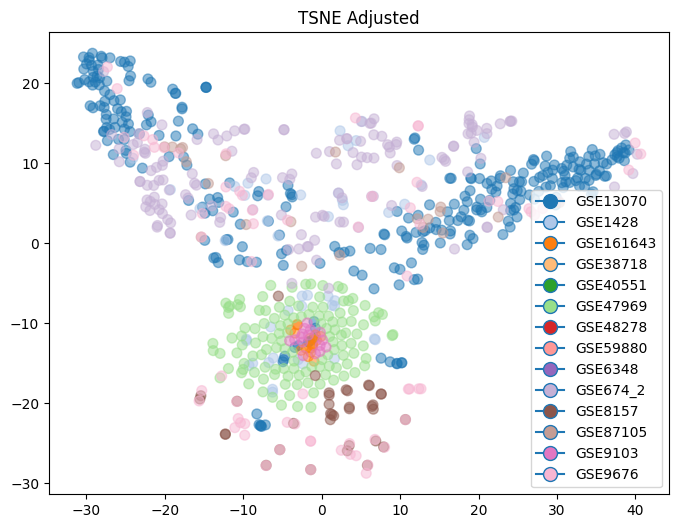

<Figure size 640x480 with 0 Axes>

In [94]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
plt.show()

plt.savefig("TSNE_Scatter_Plot_Experiment_reCombat.jpg")

Using PCA

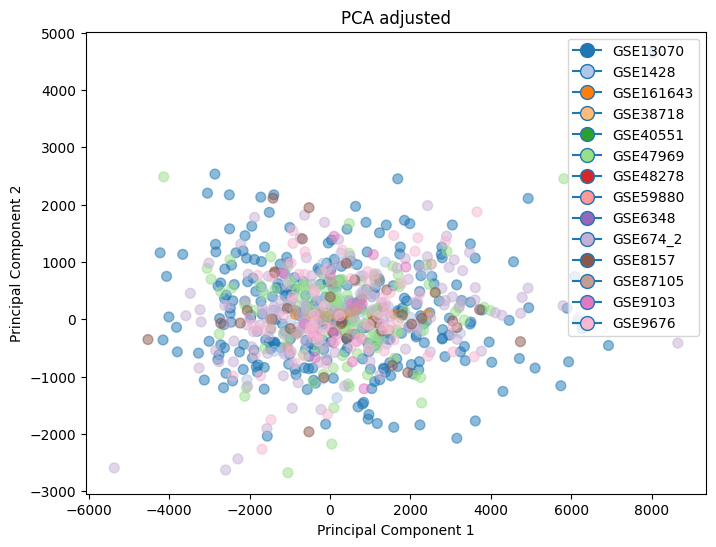

<Figure size 640x480 with 0 Axes>

In [95]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
plt.show()
plt.savefig("PCA_Scatter_Plot_Experiment_reCombat.jpg")

Lookign at the age

In [96]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


tSNE

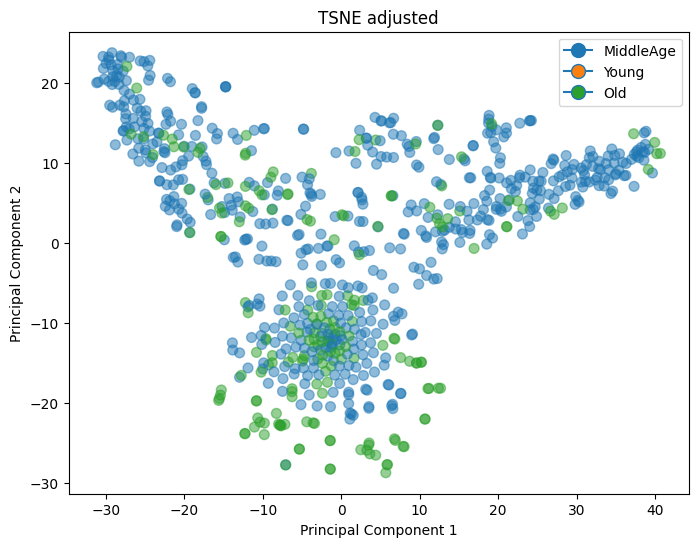

<Figure size 640x480 with 0 Axes>

In [97]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
plt.show()
plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

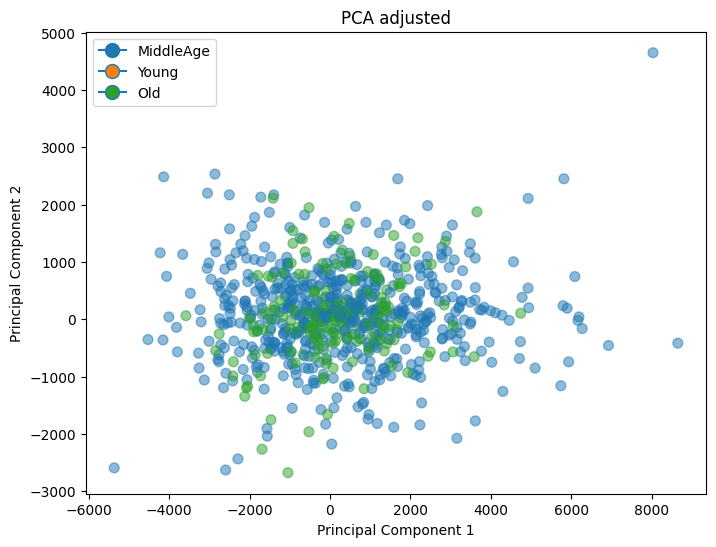

<Figure size 640x480 with 0 Axes>

In [98]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
plt.show()

plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

Unadjusted

In [99]:
X = cts.values 


tSNE by experiment

In [100]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [101]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

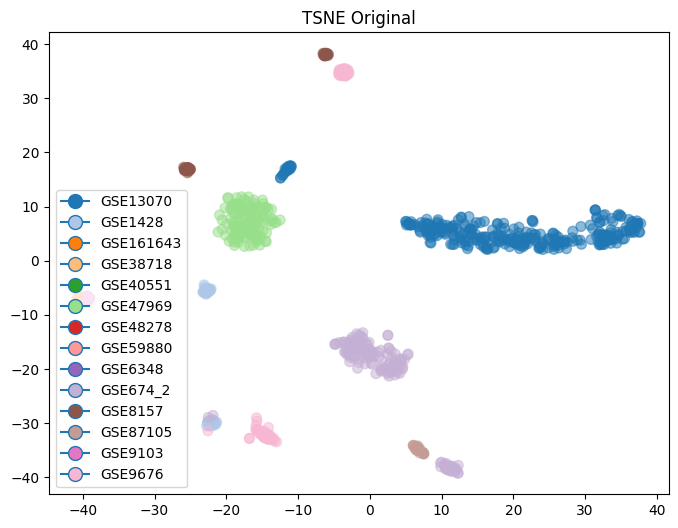

<Figure size 640x480 with 0 Axes>

In [102]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
plt.show()

plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

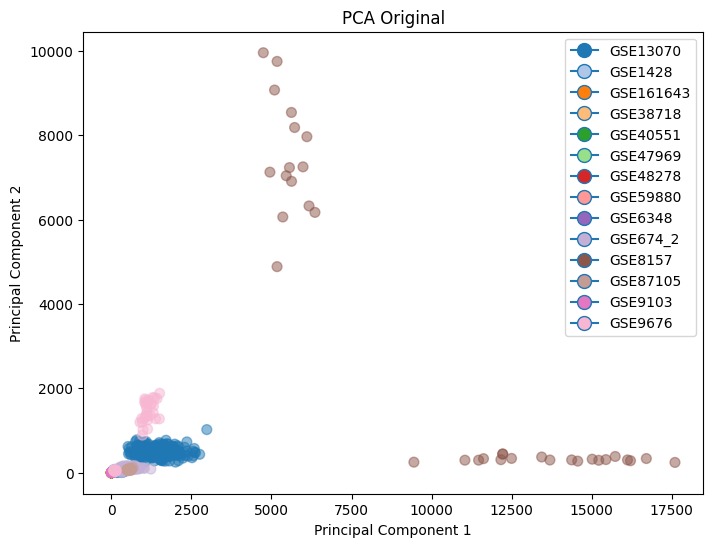

<Figure size 640x480 with 0 Axes>

In [103]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
plt.show()
plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [104]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

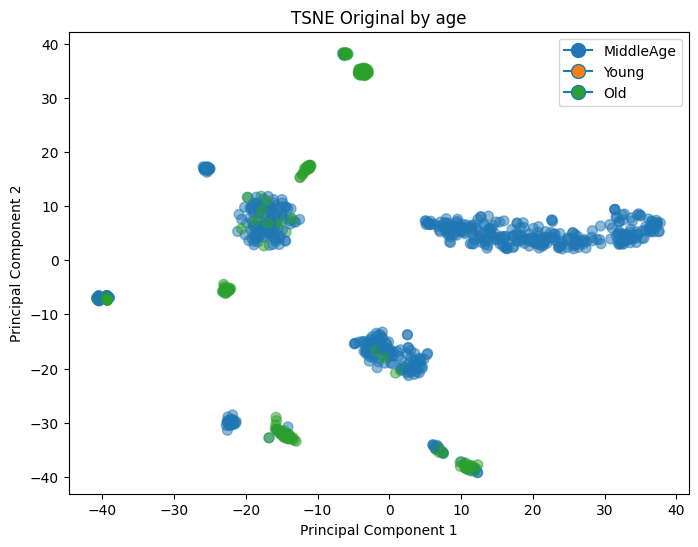

<Figure size 640x480 with 0 Axes>

In [105]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
plt.show()
plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

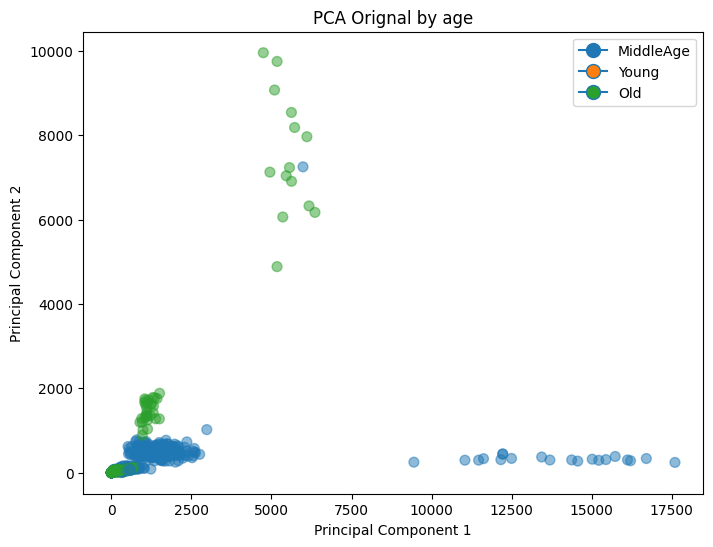

<Figure size 640x480 with 0 Axes>

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
plt.show()
plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP

In [107]:
import umap


/home/karen/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/karen/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/karen/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The '